In [1]:
import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

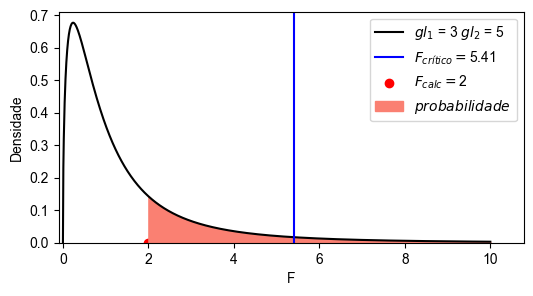

In [5]:
def make_f_distribution_plot(Fcalc, gl_numerator, gl_denominator, alpha=0.05):
    
    Ftab = stats.f.ppf(1-alpha, gl_numerator, gl_denominator)
    
    # Verificando qual é o maior valor para adaptar o intervalo do eixo x
    if Fcalc > Ftab:
        x_max = Fcalc*1.05
    else:
        x_max = Ftab*1.05 + 5

    # obtendo valores de x para o gráfico
    x = np.linspace(0, int(x_max), 1000)

    # criando uma instância para a distribuição F com grau de liberdade do teste
    f1 = stats.f(gl_numerator, gl_denominator, 0)

    # plotando o gráfico
    # criando o canvas
    plt.figure(figsize=(6, 3))
    # adicionando a linha com valores teórios
    legend = '$gl_{1}$ = ' + str(gl_numerator) + ' $gl_{2}$ = ' + str(gl_denominator)
    plt.plot(x, f1.pdf(x), label = legend, color = 'black')

    # adicionando a linha com o valor crítico
    legend = '$F_{crítico} = $' + str(round(Ftab, 2))
    plt.axvline(Ftab, 0, 1, label=legend, color='blue')

    # adicionando o ponto com o valor da estatística do teste
    legend = '$F_{calc} = $' + str(round(Fcalc, 2))
    plt.scatter(Fcalc, 0, color='red', label=legend)

    # preenchendo a área do p-valor
    x = np.linspace(Fcalc, int(x_max), 1000)
    plt.fill_between(x, f1.pdf(x), label = '$probabilidade$', color = 'salmon')

    # ajustando o gráfico
    plt.xlim(-.1, x_max + 0.1)
    plt.ylim(bottom=0.0)
    plt.xlabel('F')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()  
    
make_f_distribution_plot(Fcalc=2, gl_numerator=3, gl_denominator=5, alpha=0.05)